In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [124]:
#see the dataset
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [125]:
#Remove unused columns
unused_columns = ['date','street','city','country']
data = data.drop(data[unused_columns], axis=1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


In [8]:
#Check the duplicated data
data.duplicated().sum()

0

In [11]:
data.nunique()

price            1741
bedrooms           10
bathrooms           8
sqft_living       566
sqft_lot         3113
floors              3
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

# Data Cleaning

In [126]:
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')
data['bedrooms'] = data['bedrooms'].astype('int64')
data['statezip'] = data['statezip'].str.replace('WA','')
data['statezip'] = data['statezip'].astype('int64')

In [127]:
# renaming the column yr_built to age and changing the values to age
data.rename(columns={'yr_built':'age'},inplace=True)
data['age'] = 2023 - data['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
data.rename(columns={'yr_renovated':'renovated'},inplace=True)
data['renovated'] = data['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [128]:
# using simple feature scaling
data['sqft_living'] = data['sqft_living']/data['sqft_living'].max()
data['sqft_lot'] = data['sqft_lot']/data['sqft_lot'].max()
data['sqft_above'] = data['sqft_above']/data['sqft_above'].max()
data['sqft_basement'] = data['sqft_basement']/data['sqft_basement'].max()

In [84]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,age,renovated,statezip
0,313000.0,3,1,0.098966,0.007365,1,0,0,3,0.142402,0.000000,68,1,98133
1,2384000.0,5,2,0.269572,0.008425,2,0,4,5,0.358130,0.058091,102,0,98119
2,342000.0,3,2,0.142541,0.011122,1,0,0,4,0.205101,0.000000,57,0,98042
3,420000.0,3,2,0.147710,0.007475,1,0,0,4,0.106270,0.207469,60,0,98008
4,550000.0,4,2,0.143279,0.009775,1,0,0,4,0.121148,0.165975,47,1,98052


In [68]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,age,renovated,statezip
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,0.158002,0.013826,1.459130,0.007174,0.240652,3.451739,0.194183,0.064747,52.213696,0.405435,98079.379783
std,5.638347e+05,0.908848,0.752185,0.071138,0.033405,0.552194,0.084404,0.778405,0.677230,0.091623,0.096294,29.731848,0.491029,53.142102
min,0.000000e+00,0.000000,0.000000,0.027326,0.000594,1.000000,0.000000,0.000000,1.000000,0.039320,0.000000,9.000000,0.000000,98001.000000
25%,3.228750e+05,3.000000,1.000000,0.107829,0.004655,1.000000,0.000000,0.000000,3.000000,0.126461,0.000000,26.000000,0.000000,98033.000000
50%,4.609435e+05,3.000000,2.000000,0.146233,0.007152,1.000000,0.000000,0.000000,3.000000,0.168969,0.000000,47.000000,0.000000,98072.000000
75%,6.549625e+05,4.000000,2.000000,0.193501,0.010241,2.000000,0.000000,0.000000,4.000000,0.244421,0.126556,72.000000,1.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,1.000000,1.000000,3.000000,1.000000,4.000000,5.000000,1.000000,1.000000,123.000000,1.000000,98354.000000


In [129]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Exploratory Data Analysis

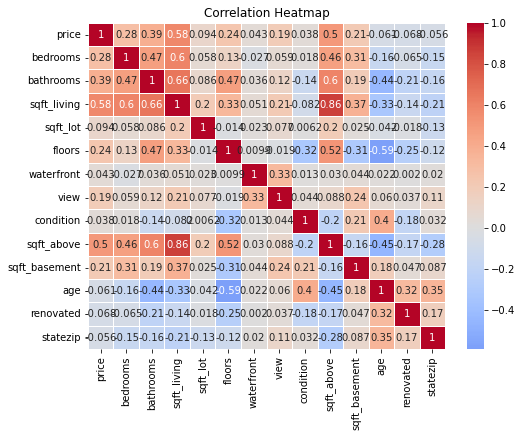

In [86]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:>

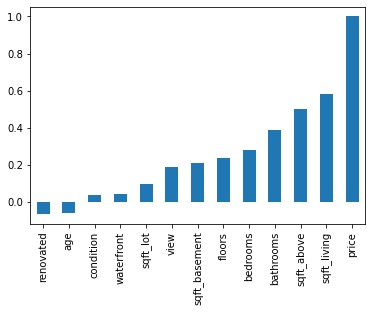

In [87]:
data.corr()['price'][:-1].sort_values().plot(kind='bar')

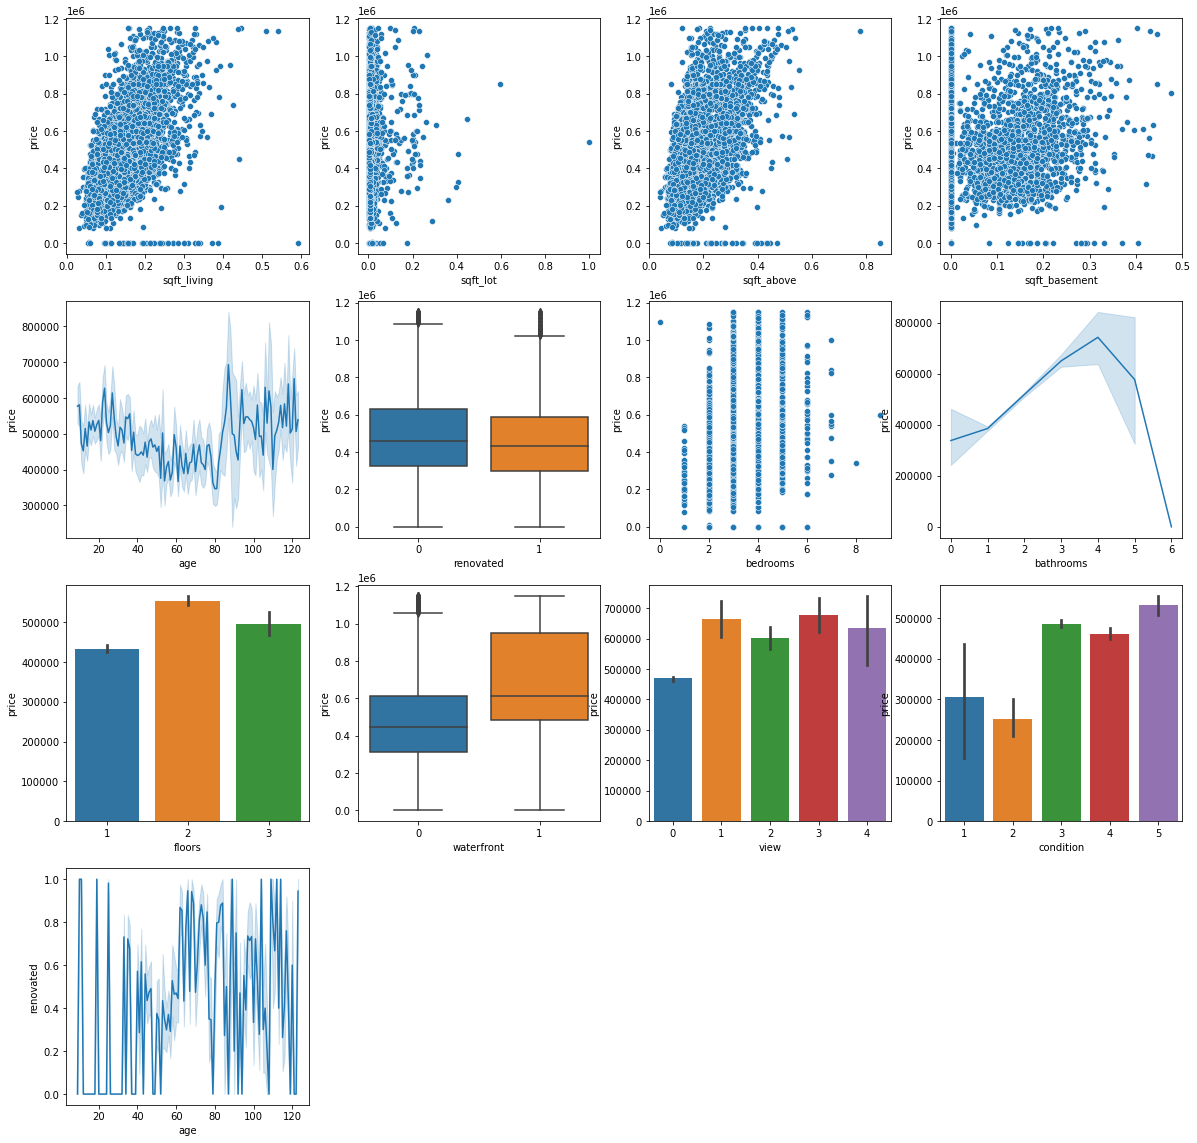

In [130]:
# visualizing the relation between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = data['sqft_living'], y = data['price'],ax=ax[0,0])
sns.scatterplot( x = data['sqft_lot'], y = data['price'],ax=ax[0,1])
sns.scatterplot( x = data['sqft_above'], y = data['price'],ax=ax[0,2])
sns.scatterplot( x = data['sqft_basement'], y = data['price'],ax=ax[0,3])
sns.lineplot( x = data['age'], y = data['price'],ax=ax[1,0])
sns.boxplot( x = data['renovated'], y = data['price'],ax=ax[1,1])
sns.scatterplot( x = data['bedrooms'], y = data['price'],ax=ax[1,2])
sns.lineplot( x = data['bathrooms'], y = data['price'],ax=ax[1,3])
sns.barplot( x = data['floors'], y = data['price'],ax=ax[2,0])
sns.boxplot( x = data['waterfront'], y = data['price'],ax=ax[2,1])
sns.barplot( x = data['view'], y = data['price'],ax=ax[2,2])
sns.barplot( x = data['condition'], y = data['price'],ax=ax[2,3])
sns.lineplot( x = data['age'], y = data['renovated'],ax=ax[3,0])
ax[3, 1].axis('off')
ax[3, 2].axis('off')
ax[3, 3].axis('off')
plt.show()

# Train Test Split

In [131]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis=1),data['price'],test_size=0.2,random_state=0)

# Train the model

In [141]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.466460634727932

## Polynomial Regression

In [144]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [148]:
#training the model
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.4918994507633929

In [196]:
pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)

0.4918994507633929

## Lasso Regression

In [191]:
modelLasso = linear_model.Lasso(alpha=0.1)
modelLasso.fit(X_train,y_train)
modelLasso.score(X_test,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+13, tolerance: 1.665e+10
  model = cd_fast.enet_coordinate_descent(


0.46646173180622374

## Decision Tree Regression

In [194]:
dtr = DecisionTreeRegressor(max_depth=7)
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.46541590905132313

## Random Forest Regression

In [185]:
rfr = RandomForestRegressor(max_depth=21, random_state=0)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.6223574748103908